<a href="https://colab.research.google.com/github/enjimohamed/CODSOFT/blob/main/TITANICSURVIVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Read File

In [277]:
fl=pd.read_csv("/content/Titanic-Dataset.csv")

In [278]:
fl.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# preprocessing

In [279]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [280]:
fl.duplicated().sum()

0

In [281]:
fl.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [282]:
fl.set_index(fl['PassengerId'],inplace=True)

In [283]:
agemean=fl['Age'].mean()

In [284]:
fl['Age'].fillna(agemean,inplace=True)

In [285]:
fl=fl.drop(columns='Cabin')

In [286]:
emmode=fl['Embarked'].mode()[0]

In [287]:
fl['Embarked'].fillna(emmode,inplace=True)

In [288]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


# Data Visualization

<Axes: xlabel='Sex', ylabel='count'>

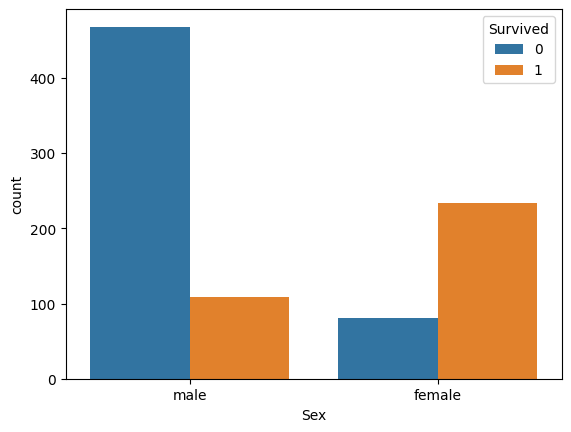

In [289]:
sns.countplot(x='Sex',  data=fl,hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

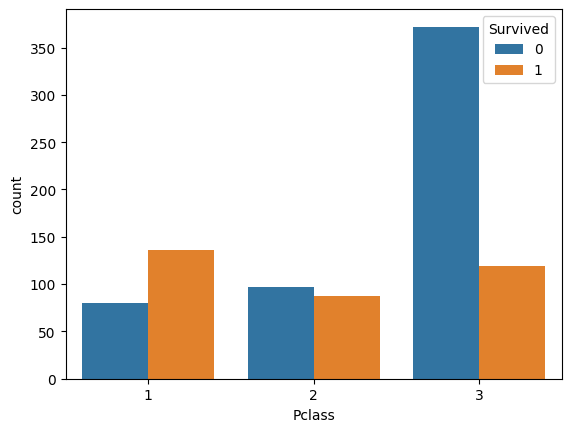

In [290]:
sns.countplot(x='Pclass',  data=fl,hue='Survived')

# Remove Outliers

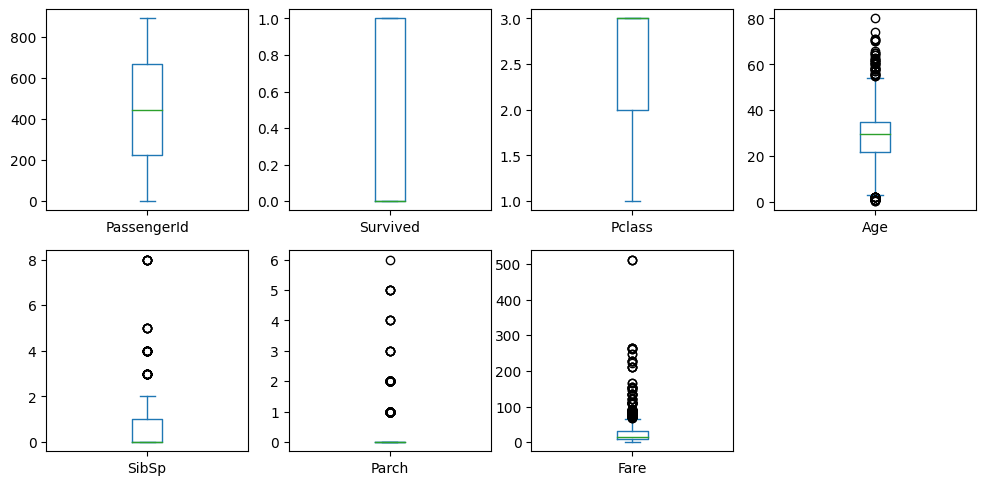

In [291]:
fl.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12))
plt.show()

<Axes: ylabel='Age'>

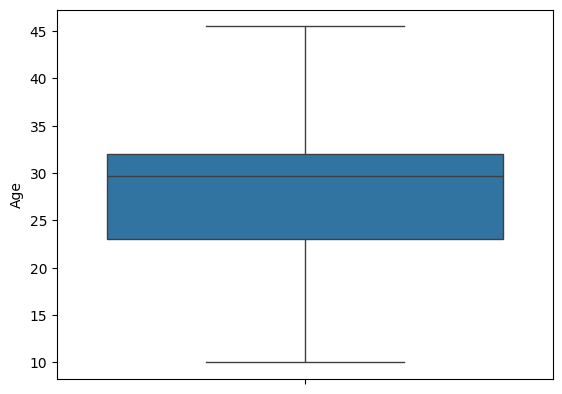

In [295]:
Q1=fl['Age'].quantile(0.25)
Q3=fl['Age'].quantile(0.75)
IQR=Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
fl = fl[(fl['Age'] >= lowerbound) & (fl['Age'] <= upperbound)]
sns.boxplot(fl['Age'])

<Axes: ylabel='Fare'>

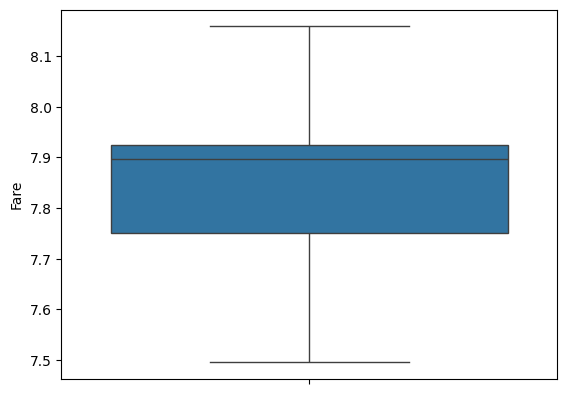

In [307]:
Q1=fl['Fare'].quantile(0.25)
Q3=fl['Fare'].quantile(0.75)
IQR=Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
fl = fl[(fl['Fare'] >= lowerbound) & (fl['Fare'] <= upperbound)]
sns.boxplot(fl['Fare'])

<Axes: ylabel='SibSp'>

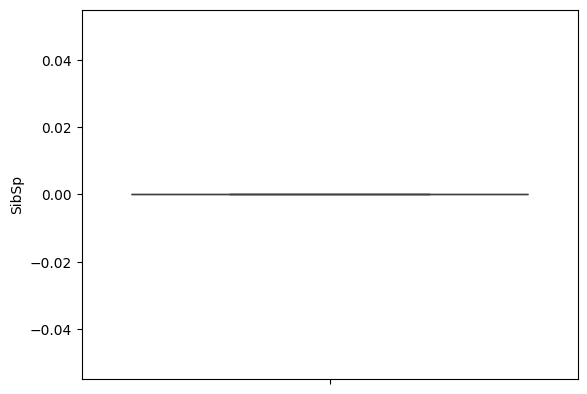

In [308]:
Q1=fl['SibSp'].quantile(0.25)
Q3=fl['SibSp'].quantile(0.75)
IQR=Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
fl = fl[(fl['SibSp'] >= lowerbound) & (fl['SibSp'] <= upperbound)]
sns.boxplot(fl['SibSp'])

<Axes: ylabel='Parch'>

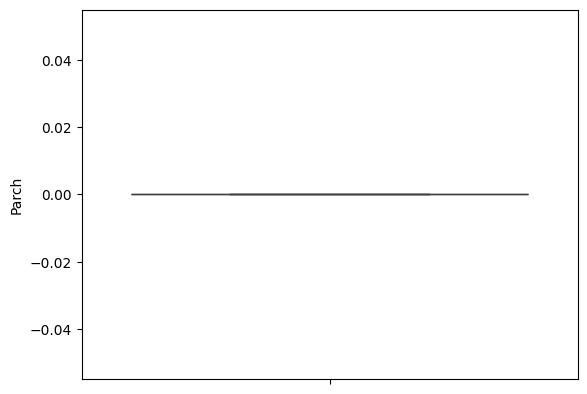

In [309]:
Q1=fl['Parch'].quantile(0.25)
Q3=fl['Parch'].quantile(0.75)
IQR=Q3-Q1
lowerbound=Q1-1.5*IQR
upperbound=Q3+1.5*IQR
fl = fl[(fl['Parch'] >= lowerbound) & (fl['Parch'] <= upperbound)]
sns.boxplot(fl['Parch'])

# Data Encoding

In [310]:

fl['Sex']=fl['Sex'].map({'male':0,'female':1})
fl['Embarked']=fl['Embarked'].map({'S':0,'C':1,'Q':2})

In [311]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 3 to 891
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  184 non-null    int64  
 1   Survived     184 non-null    int64  
 2   Pclass       184 non-null    int64  
 3   Name         184 non-null    object 
 4   Sex          184 non-null    int64  
 5   Age          184 non-null    float64
 6   SibSp        184 non-null    int64  
 7   Parch        184 non-null    int64  
 8   Ticket       184 non-null    object 
 9   Fare         184 non-null    float64
 10  Embarked     184 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 17.2+ KB


# Models

In [312]:
x=fl.drop(["Survived","Name","Ticket"],axis=1)
y=fl['Survived']

In [273]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [313]:
logisticreg=LogisticRegression()
logisticreg.fit(x_train,y_train)
ypredict=logisticreg.predict(x_test)
accuracy = accuracy_score(y_test, ypredict)
print("Accuracy:", accuracy)

Accuracy: 0.8022388059701493


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
